## Mapperと様々な次元削減手法

### 1. digitsデータセット（MNISTの小型版）

#### 1-1. データセットの確認

0～9の手書き数字のグレースケール画像（8×8ピクセル）がそれぞれ180個前後，計1797個．

In [1]:
from sklearn import datasets
import numpy as np

digits = datasets.load_digits()
data = digits.data # 特徴量（各ピクセル：グレースケールの輝度）の配列
target = digits.target # 正解ラベル

print(data.shape)
print(data)
print(target)

print(np.count_nonzero(target==0)) # 0の数 np.sum(target==0)より高速
print(np.count_nonzero(target==1))
print(np.count_nonzero(target==2))
print(np.count_nonzero(target==3))
print(np.count_nonzero(target==4))
print(np.count_nonzero(target==5))
print(np.count_nonzero(target==6))
print(np.count_nonzero(target==7))
print(np.count_nonzero(target==8))
print(np.count_nonzero(target==9))

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
178
182
177
183
181
182
181
179
174
180


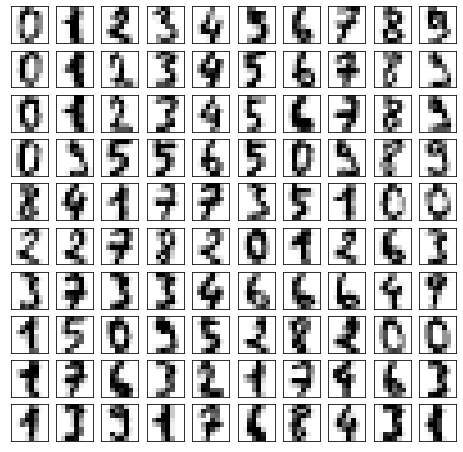

In [2]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={"xticks":[], "yticks":[]}) # 10×10個出力，目盛りを表示しない
for i, ax in enumerate(ax.flat): # 2次元のaxを1次元に変形して処理
    ax.imshow(digits.images[i], cmap='Greys') # 画像の色：グレー
plt.show()

#### 1-2. PCAで次元削減

Text(0.5, 1.0, 'PCA')

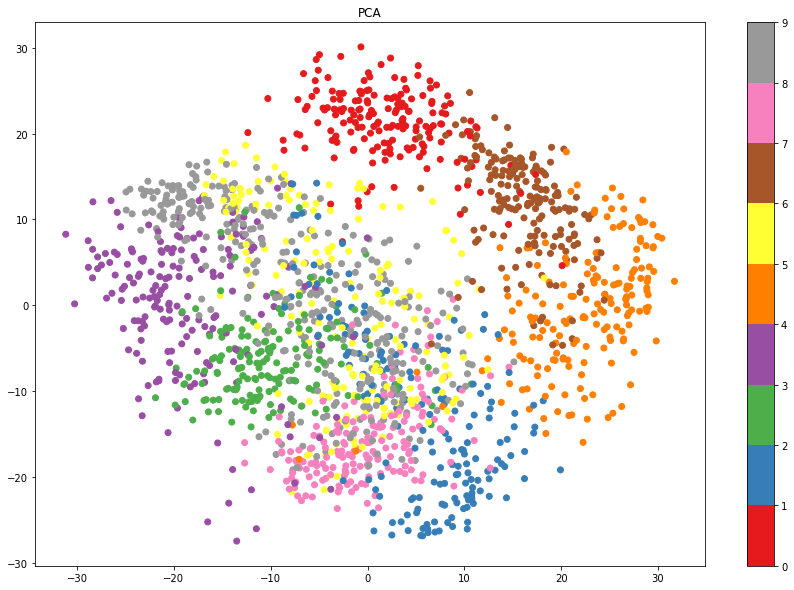

In [3]:
from sklearn.decomposition import PCA

data_PCA = PCA(n_components=2).fit_transform(data)

plt.figure(figsize=(15, 10))
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=target, cmap='Set1')
plt.colorbar()
plt.title('PCA')

In [5]:
"""
cmp = plt.get_cmap('Set1')
plt.figure(figsize=(10, 10))
plt.xlim(data_PCA[:, 0].min(), data_PCA[:, 0].max() + 1)
plt.ylim(data_PCA[:, 1].min(), data_PCA[:, 1].max() + 1)
for i in range(len(data)):
    plt.text(data_PCA[i, 0], data_PCA[i, 1], str(target[i]),
             color = cmp(target[i]),
             fontdict={'weight': 'bold', 'size': 9})
plt.title('PCA')
"""

"\ncmp = plt.get_cmap('Set1')\nplt.figure(figsize=(10, 10))\nplt.xlim(data_PCA[:, 0].min(), data_PCA[:, 0].max() + 1)\nplt.ylim(data_PCA[:, 1].min(), data_PCA[:, 1].max() + 1)\nfor i in range(len(data)):\n    plt.text(data_PCA[i, 0], data_PCA[i, 1], str(target[i]),\n             color = cmp(target[i]),\n             fontdict={'weight': 'bold', 'size': 9})\nplt.title('PCA')\n"

#### 1-3. t-SNEで次元削減

c:\Users\Takumu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Takumu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 't-SNE')

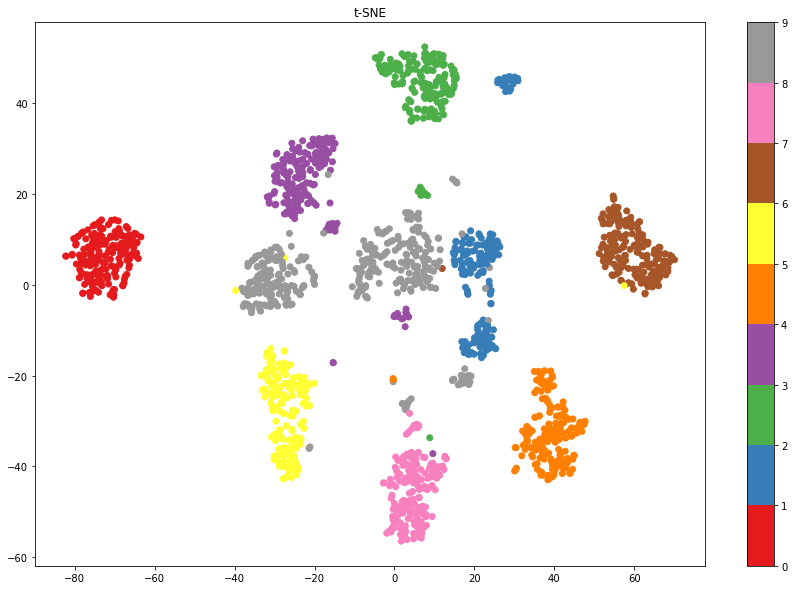

In [4]:
from sklearn.manifold import TSNE
data_tSNE = TSNE(n_components=2, random_state=0, perplexity=30).fit_transform(data)

plt.figure(figsize=(15, 10))
plt.scatter(data_tSNE[:, 0], data_tSNE[:, 1], c=target, cmap='Set1')
plt.colorbar()
plt.title('t-SNE')

In [6]:
"""
cmp = plt.get_cmap('Set1')
plt.figure(figsize=(10, 10))
plt.xlim(data_tSNE[:, 0].min(), data_tSNE[:, 0].max() + 1)
plt.ylim(data_tSNE[:, 1].min(), data_tSNE[:, 1].max() + 1)
for i in range(len(data)):
    plt.text(data_tSNE[i, 0], data_tSNE[i, 1], str(target[i]),
             color = cmp(target[i]),
             fontdict={'weight': 'bold', 'size': 9})
plt.title('t-SNE')
"""

"\ncmp = plt.get_cmap('Set1')\nplt.figure(figsize=(10, 10))\nplt.xlim(data_tSNE[:, 0].min(), data_tSNE[:, 0].max() + 1)\nplt.ylim(data_tSNE[:, 1].min(), data_tSNE[:, 1].max() + 1)\nfor i in range(len(data)):\n    plt.text(data_tSNE[i, 0], data_tSNE[i, 1], str(target[i]),\n             color = cmp(target[i]),\n             fontdict={'weight': 'bold', 'size': 9})\nplt.title('t-SNE')\n"

#### 1-4. UMAPで次元削減

Text(0.5, 1.0, 'UMAP')

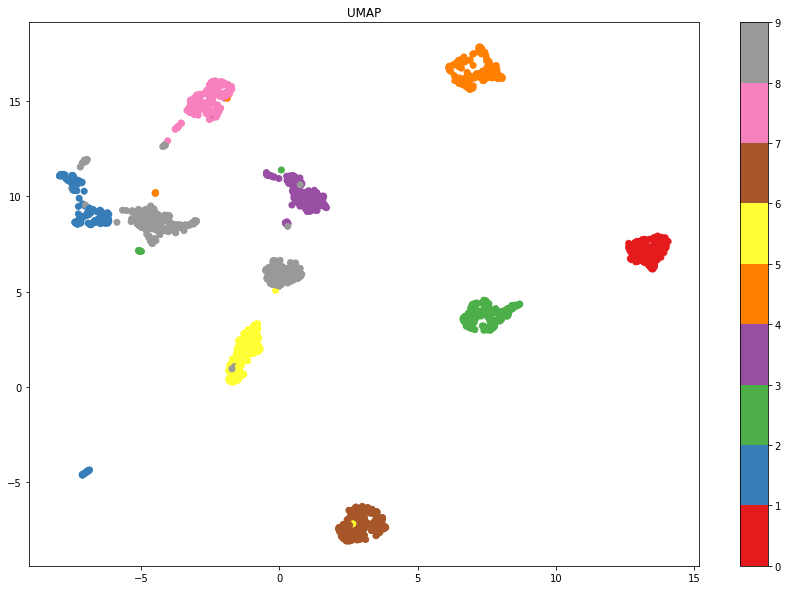

In [7]:
# !pip install umap-learn
import umap
data_UMAP = umap.UMAP(n_components=2, random_state=0, n_neighbors=15).fit_transform(data)

plt.figure(figsize=(15, 10))
plt.scatter(data_UMAP[:, 0], data_UMAP[:, 1], c=target, cmap='Set1')
plt.colorbar()
plt.title('UMAP')

In [9]:
"""
cmp = plt.get_cmap('Set1')
plt.figure(figsize=(10, 10))
plt.xlim(data_UMAP[:, 0].min(), data_UMAP[:, 0].max() + 1)
plt.ylim(data_UMAP[:, 1].min(), data_UMAP[:, 1].max() + 1)
for i in range(len(data)):
    plt.text(data_UMAP[i, 0], data_UMAP[i, 1], str(target[i]),
             color = cmp(target[i]),
             fontdict={'weight': 'bold', 'size': 9})
plt.title('UMAP')
"""

"\ncmp = plt.get_cmap('Set1')\nplt.figure(figsize=(10, 10))\nplt.xlim(data_UMAP[:, 0].min(), data_UMAP[:, 0].max() + 1)\nplt.ylim(data_UMAP[:, 1].min(), data_UMAP[:, 1].max() + 1)\nfor i in range(len(data)):\n    plt.text(data_UMAP[i, 0], data_UMAP[i, 1], str(target[i]),\n             color = cmp(target[i]),\n             fontdict={'weight': 'bold', 'size': 9})\nplt.title('UMAP')\n"

#### 1-5. PCA＋UMAPで次元削減

In [8]:
import pandas as pd

pca = PCA(n_components=0.99, random_state=0) # 累積寄与率99％を超えるまでの主成分（少しだけ次元削減しておく）
X_pc = pca.fit_transform(digits.data)
df_pca = pd.DataFrame(X_pc, columns=["PC{}".format(i + 1) for i in range(len(X_pc[0]))])
print("主成分の数: ", pca.n_components_) 
print("保たれている情報: ", np.sum(pca.explained_variance_ratio_))
df_pca.head()

主成分の数:  41
保たれている情報:  0.9901018242795548


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41
0,-1.259466,21.274883,-9.463055,13.014189,-7.128823,-7.440659,3.252837,2.553470,-0.581842,3.625697,...,-0.755016,0.162842,-2.112977,1.094823,0.195686,-0.089994,-2.763741,1.088883,0.206004,1.704511
1,7.957611,-20.768699,4.439506,-14.893664,5.896249,-6.485622,2.126228,-4.615936,3.587450,-1.074705,...,1.290907,-2.154407,0.166806,3.191428,-1.532268,-3.688113,2.073790,-0.230846,0.722354,-1.552377
2,6.991923,-9.955986,2.958558,-12.288302,-18.126023,-4.507664,1.843122,-16.415200,0.719233,4.255805,...,0.450445,0.341085,-0.505617,-2.808245,-1.253872,-0.220568,0.038202,1.108652,3.285183,1.450043
3,-15.906105,3.332464,9.824372,-12.275838,6.965169,1.089483,-1.042085,10.973556,-3.259735,6.498753,...,2.086400,3.220693,-0.826725,-1.392380,2.075339,-1.291333,1.963138,1.893076,0.675706,-0.837613
4,23.306867,4.269061,-5.675129,-13.851524,-0.358124,-2.857574,-0.720497,13.041696,-3.835413,13.414164,...,0.405450,-0.079859,1.284010,1.015915,3.805724,0.627322,-0.159870,-2.986691,-0.397633,0.064666


Text(0.5, 1.0, 'PCA and UMAP')

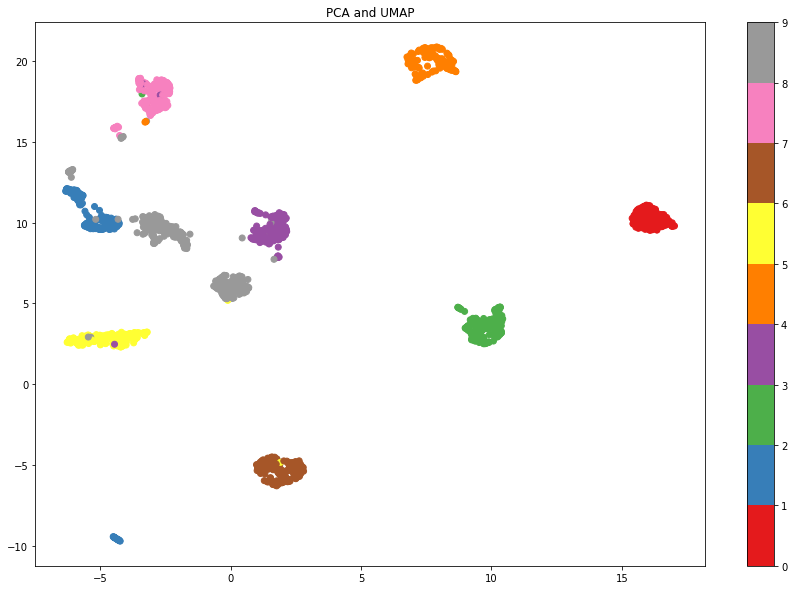

In [9]:
data_PCA_UMAP = umap.UMAP(n_components=2, random_state=0, n_neighbors=15).fit_transform(df_pca)

plt.figure(figsize=(15, 10))
plt.scatter(data_PCA_UMAP[:, 0], data_PCA_UMAP[:, 1], c=target, cmap='Set1')
plt.colorbar()
plt.title('PCA and UMAP')

In [12]:
"""
cmp = plt.get_cmap('Set1')
plt.figure(figsize=(10, 10))
plt.xlim(data_PCA_UMAP[:, 0].min(), data_PCA_UMAP[:, 0].max() + 1)
plt.ylim(data_PCA_UMAP[:, 1].min(), data_PCA_UMAP[:, 1].max() + 1)
for i in range(len(data)):
    plt.text(data_PCA_UMAP[i, 0], data_PCA_UMAP[i, 1], str(target[i]),
             color = cmp(target[i]),
             fontdict={'weight': 'bold', 'size': 9})
plt.title('PCA and UMAP')
"""

"\ncmp = plt.get_cmap('Set1')\nplt.figure(figsize=(10, 10))\nplt.xlim(data_PCA_UMAP[:, 0].min(), data_PCA_UMAP[:, 0].max() + 1)\nplt.ylim(data_PCA_UMAP[:, 1].min(), data_PCA_UMAP[:, 1].max() + 1)\nfor i in range(len(data)):\n    plt.text(data_PCA_UMAP[i, 0], data_PCA_UMAP[i, 1], str(target[i]),\n             color = cmp(target[i]),\n             fontdict={'weight': 'bold', 'size': 9})\nplt.title('PCA and UMAP')\n"

#### 1-7. 比較

PCA：うまく分類できているとは言えない．→次元削減前はきれいに分類されている．→上手く次元削減できていない．線形手法なので，非線形なデータの構造は捉えにくい．

t-SNEでもPCAよりはるかに分類できているが，UMAPの方がコンパクトにまとまって分類されている（一般的に実行時間も短い）．

#### 1-8. Mapper（フィルター関数：t-SNE）

In [10]:
import kmapper as km
import sklearn

mapper = km.KeplerMapper(verbose=0)

In [16]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()
lens_tSNE = mmsc.fit_transform(data_tSNE)
lens_tSNE

array([[0.05280164, 0.5414768 ],
       [0.69844526, 0.4809375 ],
       [0.5832525 , 0.6997596 ],
       ...,
       [0.57864535, 0.5929459 ],
       [0.37513423, 0.5153756 ],
       [0.53709584, 0.6081421 ]], dtype=float32)

In [20]:
simplicial_complex = mapper.map(lens_tSNE, X=data,
                                cover=km.Cover(n_cubes=35, perc_overlap=0.4),
                                clusterer=sklearn.cluster.DBSCAN(eps=10, min_samples=2))
simplicial_complex['nodes']
# ここが少なかったら増える方向にDBSCANのパラメータを調整．

defaultdict(list,
            {'cube10_cluster0': [1463, 1464],
             'cube184_cluster0': [1458, 1509],
             'cube199_cluster0': [556, 612],
             'cube200_cluster0': [556, 612],
             'cube214_cluster0': [1458, 1509],
             'cube227_cluster0': [556, 612],
             'cube228_cluster0': [556, 612],
             'cube236_cluster0': [1472, 1531],
             'cube258_cluster0': [1472, 1531],
             'cube265_cluster0': [1471, 1485],
             'cube283_cluster0': [1436, 1505],
             'cube283_cluster1': [1471, 1485],
             'cube284_cluster0': [1436, 1505],
             'cube288_cluster0': [1076, 1107, 1134],
             'cube288_cluster1': [1247, 1250],
             'cube289_cluster0': [1076, 1134],
             'cube289_cluster1': [1247, 1250],
             'cube299_cluster0': [1076, 1107, 1134],
             'cube299_cluster1': [1247, 1250],
             'cube300_cluster0': [777, 1237],
             'cube300_cluster1': [1076, 

In [21]:
_ = mapper.visualize(
        simplicial_complex,
        title='digits_tSNE',
        path_html='digits_tSNE.html',
        color_values=target,
        color_function_name='target',
    )

#### 1-9. Mapper（フィルター関数：UMAP）

In [17]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()
lens_UMAP = mmsc.fit_transform(data_UMAP)
lens_UMAP

array([[0.96156913, 0.5661628 ],
       [0.03118572, 0.66202986],
       [0.13262409, 0.58723587],
       ...,
       [0.14357069, 0.64233255],
       [0.35042226, 0.5589068 ],
       [0.15924273, 0.63113207]], dtype=float32)

In [18]:
simplicial_complex = mapper.map(lens_UMAP, X=data,
                                cover=km.Cover(n_cubes=35, perc_overlap=0.4),
                                clusterer=sklearn.cluster.DBSCAN(eps=10, min_samples=2))
simplicial_complex['nodes']
# ここが少なかったら増える方向にDBSCANのパラメータを調整．

defaultdict(list,
            {'cube2_cluster0': [777, 1237],
             'cube2_cluster1': [1213, 1329, 1621],
             'cube2_cluster2': [1585, 1631, 1640, 1648],
             'cube5_cluster0': [1436, 1505],
             'cube5_cluster1': [1471, 1485],
             'cube6_cluster0': [1471, 1485],
             'cube8_cluster0': [982, 991],
             'cube9_cluster0': [982, 991],
             'cube10_cluster0': [777, 1237],
             'cube10_cluster1': [1076, 1134],
             'cube10_cluster2': [1213, 1329, 1621],
             'cube10_cluster3': [1247, 1250],
             'cube10_cluster4': [1585, 1631, 1640, 1648],
             'cube11_cluster0': [1076, 1107, 1134],
             'cube11_cluster1': [1247, 1250],
             'cube27_cluster0': [556, 612],
             'cube28_cluster0': [556, 612],
             'cube46_cluster0': [1458, 1509],
             'cube52_cluster0': [1458, 1509],
             'cube113_cluster0': [522, 611],
             'cube116_cluster0': [522, 

In [19]:
_ = mapper.visualize(
        simplicial_complex,
        title='digits_UMAP',
        path_html='digits_UMAP.html',
        color_values=target,
        color_function_name='target',
    )

#### 1-10. Mapper（フィルター関数：PCA＋UMAP）

#### 1-11. 考察